In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn .preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

## Regression Techniques

The Drug.csv file contains performance metrics for 37 common conditions, 
including drug name, type, form, average price, reviews, effectiveness, ease of use, and satisfaction<br>

Condition: The medical condition associated with the drug. (String)<br>
Drug: The name of the drug. (String)<br>
Indication: The purpose of the drug. (String)<br>
Type: The type of drug (generic or brand). (String)<br>
Reviews: The number of reviews associated with the drug. (Integer)<br>
Effective: The effectiveness of the drug based on customer reviews. (Integer)<br>
EaseOfUse: The ease of use of the drug based on customer reviews. (Integer)<br>
Satisfaction: The satisfaction level of the drug based on customer reviews. (Integer)<br>
Information: Other relevant information about the drug. (String)<br>

In [2]:
drug = pd.read_csv('Drug.csv')

In [3]:
drug.head()

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction,Information
0,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994 Reviews,2.52,3.01,1.84,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...
1,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994 Reviews,2.52,3.01,1.84,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...
2,Acute Bacterial Sinusitis,Moxifloxacin,On Label,RX,755 Reviews,2.78,3.00,2.08,\r\n\t\t\t\t\t This is a generic drug. The ave...
3,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584 Reviews,3.21,4.01,2.57,\r\n\t\t\t\t\tAzithromycin is an antibiotic (m...
4,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584 Reviews,3.21,4.01,2.57,\r\n\t\t\t\t\tAzithromycin is an antibiotic (m...


In [4]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2219 entries, 0 to 2218
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Condition     2219 non-null   object 
 1   Drug          2219 non-null   object 
 2   Indication    2219 non-null   object 
 3   Type          2219 non-null   object 
 4   Reviews       2219 non-null   object 
 5   Effective     2219 non-null   float64
 6   EaseOfUse     2219 non-null   float64
 7   Satisfaction  2219 non-null   float64
 8   Information   2219 non-null   object 
dtypes: float64(3), object(6)
memory usage: 156.2+ KB


In [5]:
drug.describe().T

,count,mean,std,min,25%,50%,75%,max
Effective,2219.0,3.557972,1.113128,1.0,3.00,3.68,4.33,5.0
EaseOfUse,2219.0,3.958824,1.037877,1.0,3.54,4.10,5.00,5.0
Satisfaction,2219.0,3.218774,1.230933,1.0,2.40,3.13,4.00,5.0


In [6]:
drug['Condition'].value_counts()

Condition
fever                                        308
hypertension                                 236
Atopic Dermatitis                            209
endometriosis                                163
gastroesophageal reflux disease              131
Bacterial Urinary Tract Infection            131
back pain                                    123
gout                                         110
Pharyngitis due to Streptococcus Pyogenes     83
vertigo                                       81
flatulence                                    76
Acute Bacterial Sinusitis                     65
hypercholesterolemia                          59
hemorrhoids                                   53
diverticulitis of gastrointestinal tract      48
Bacterial Conjunctivitis                      42
edema                                         41
prevention of cerebrovascular accident        38
depression                                    32
vulvovaginal candidiasis                      29
fibromyalg

In [7]:
drug['Drug'].value_counts()

Drug
Acetaminophen                                             114
Ibuprofen                                                  73
Diphenhydramine Hcl                                        58
Aspirin                                                    42
Sulfamethoxazole-Trimethoprim                              40
                                                         ... 
Pramoxine-Zinc Oxide                                        1
Hydrocortisone Acetate, Bismuth Subg-Balsam-Znox-Resor      1
Fluocinolone-Skin Clnsr28                                   1
Starch, Pramoxine-Mineral Oil-Zinc                          1
Zinc Oxide                                                  1
Name: count, Length: 470, dtype: int64

In [8]:
drug['Indication'].value_counts()

Indication
On Label     1723
Off Label     465
\r\n           31
Name: count, dtype: int64

In [9]:
drug['Type'].value_counts()

Type
RX        1401
OTC        737
RX/OTC      74
\r\n         7
Name: count, dtype: int64

In [10]:
drug['Reviews'].value_counts()

Reviews
1 Reviews       563
2 Reviews       238
3 Reviews       120
4 Reviews       100
5 Reviews        77
               ... 
3066 Reviews      1
4647 Reviews      1
51 Reviews        1
62 Reviews        1
123 Reviews       1
Name: count, Length: 241, dtype: int64

We have Information column in the dataset which is not required for data pre-processing, hence we can remove the column

In [11]:
drug = drug.drop(columns=['Information'])

In [12]:
drug.head()

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction
0,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994 Reviews,2.52,3.01,1.84
1,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994 Reviews,2.52,3.01,1.84
2,Acute Bacterial Sinusitis,Moxifloxacin,On Label,RX,755 Reviews,2.78,3.00,2.08
3,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584 Reviews,3.21,4.01,2.57
4,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584 Reviews,3.21,4.01,2.57


Also we have Indication and Type columns with unnecessary values, hence we need to replace them with null values.

We can also convert Reviews column into numerical

In [13]:
drug[drug['Indication'] == '\r\n']

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction
141,Atopic Dermatitis,Hydrocortisone-Iodoquinl-Aloe2,\r\n,RX,14 Reviews,3.00,3.00,3.00
239,Atopic Dermatitis,Hydrocortisone-Iodoquinol,\r\n,RX,1 Reviews,4.00,4.00,4.00
298,back pain,Trolamine Salicylate,\r\n,OTC,22 Reviews,2.89,4.00,2.89
299,back pain,Trolamine Salicylate,\r\n,OTC,20 Reviews,4.00,4.80,4.00
307,back pain,Trolamine Salicylate,\r\n,OTC,9 Reviews,4.00,5.00,3.75
313,back pain,Trolamine Salicylate,\r\n,OTC,6 Reviews,3.00,3.00,3.00
317,back pain,Trolamine Salicylate,\r\n,OTC,5 Reviews,5.00,5.00,5.00
322,back pain,Trolamine Salicylate,\r\n,OTC,3 Reviews,5.00,5.00,5.00
331,back pain,Trolamine Salicylate,\r\n,OTC,2 Reviews,3.00,4.00,3.00
337,back pain,Trolamine Salicylate,\r\n,OTC,2 Reviews,4.00,5.00,5.00


In [14]:
drug[drug['Drug'] == 'Trolamine Salicylate']

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction
298,back pain,Trolamine Salicylate,\r\n,OTC,22 Reviews,2.89,4.0,2.89
299,back pain,Trolamine Salicylate,\r\n,OTC,20 Reviews,4.00,4.8,4.00
307,back pain,Trolamine Salicylate,\r\n,OTC,9 Reviews,4.00,5.0,3.75
313,back pain,Trolamine Salicylate,\r\n,OTC,6 Reviews,3.00,3.0,3.00
317,back pain,Trolamine Salicylate,\r\n,OTC,5 Reviews,5.00,5.0,5.00
322,back pain,Trolamine Salicylate,\r\n,OTC,3 Reviews,5.00,5.0,5.00
331,back pain,Trolamine Salicylate,\r\n,OTC,2 Reviews,3.00,4.0,3.00
337,back pain,Trolamine Salicylate,\r\n,OTC,2 Reviews,4.00,5.0,5.00
346,back pain,Trolamine Salicylate,\r\n,OTC,2 Reviews,5.00,5.0,5.00
371,back pain,Trolamine Salicylate,\r\n,OTC,1 Reviews,3.00,4.0,1.00


In [15]:
drug[drug['Drug'] == 'Phenyltoloxamine-Acetaminophen']

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction
926,fever,Phenyltoloxamine-Acetaminophen,\r\n,RX,10 Reviews,4.00,3.80,4.00
933,fever,Phenyltoloxamine-Acetaminophen,\r\n,RX,7 Reviews,3.50,5.00,3.25
946,fever,Phenyltoloxamine-Acetaminophen,\r\n,OTC,5 Reviews,4.50,4.50,5.00
955,fever,Phenyltoloxamine-Acetaminophen,\r\n,OTC,4 Reviews,3.67,4.33,3.33
961,fever,Phenyltoloxamine-Acetaminophen,\r\n,RX,4 Reviews,4.67,5.00,4.33
965,fever,Phenyltoloxamine-Acetaminophen,\r\n,RX/OTC,4 Reviews,2.50,4.00,2.50
978,fever,Phenyltoloxamine-Acetaminophen,\r\n,RX,3 Reviews,3.00,3.50,3.00
986,fever,Phenyltoloxamine-Acetaminophen,\r\n,RX,3 Reviews,3.50,4.00,3.50
994,fever,Phenyltoloxamine-Acetaminophen,\r\n,RX/OTC,3 Reviews,4.00,5.00,4.00
1015,fever,Phenyltoloxamine-Acetaminophen,\r\n,OTC,2 Reviews,2.00,4.00,1.50


In [16]:
drug[drug['Condition'] == 'fever']['Indication'].value_counts(normalize=True)

Indication
On Label     0.902597
\r\n         0.055195
Off Label    0.042208
Name: proportion, dtype: float64

Here we are filtering fever condition and taking the making maximum occured Indication and replacing that value with the '\r\n' value

In [17]:
drug.replace("\r\n", np.nan, inplace=True)

In [18]:
drug[drug['Condition'] == 'fever'] = drug[drug['Condition'] == 'fever'].fillna('On Label')

In [19]:
drug[drug['Condition'] == 'fever']

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction
878,fever,Naproxen,On Label,RX,740 Reviews,2.82,3.70,2.42
879,fever,Naproxen,On Label,RX,740 Reviews,2.82,3.70,2.42
880,fever,Naproxen,On Label,RX,740 Reviews,2.82,3.70,2.42
881,fever,Indomethacin,Off Label,RX,315 Reviews,3.97,4.25,3.67
882,fever,Indomethacin,Off Label,RX,315 Reviews,3.97,4.25,3.67
...,...,...,...,...,...,...,...,...
1181,fever,Chlorpheniram-DM-Acetaminophen,On Label,OTC,1 Reviews,5.00,5.00,5.00
1182,fever,Doxylamine-PE-DM-Acetaminophen,On Label,OTC,1 Reviews,5.00,4.00,4.00
1183,fever,Doxylamin-PSE-DM-Acetaminophen,On Label,OTC,1 Reviews,5.00,5.00,5.00
1184,fever,Phenylephrine-DM-Acetaminophen,On Label,OTC,1 Reviews,4.00,5.00,4.00


In [20]:
drug['Condition'] == 'back pain'

0       False
1       False
2       False
3       False
4       False
        ...  
2214    False
2215    False
2216    False
2217    False
2218    False
Name: Condition, Length: 2219, dtype: bool

In [21]:
drug.loc[drug['Condition'] == 'fever', 'Indication'].isnull().sum()

0

In [22]:
drug[drug['Drug'] == 'Trolamine Salicylate']

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction
298,back pain,Trolamine Salicylate,NaN,OTC,22 Reviews,2.89,4.0,2.89
299,back pain,Trolamine Salicylate,NaN,OTC,20 Reviews,4.00,4.8,4.00
307,back pain,Trolamine Salicylate,NaN,OTC,9 Reviews,4.00,5.0,3.75
313,back pain,Trolamine Salicylate,NaN,OTC,6 Reviews,3.00,3.0,3.00
317,back pain,Trolamine Salicylate,NaN,OTC,5 Reviews,5.00,5.0,5.00
322,back pain,Trolamine Salicylate,NaN,OTC,3 Reviews,5.00,5.0,5.00
331,back pain,Trolamine Salicylate,NaN,OTC,2 Reviews,3.00,4.0,3.00
337,back pain,Trolamine Salicylate,NaN,OTC,2 Reviews,4.00,5.0,5.00
346,back pain,Trolamine Salicylate,NaN,OTC,2 Reviews,5.00,5.0,5.00
371,back pain,Trolamine Salicylate,NaN,OTC,1 Reviews,3.00,4.0,1.00


In [23]:
drug[drug['Indication'].isna()]

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction
141,Atopic Dermatitis,Hydrocortisone-Iodoquinl-Aloe2,NaN,RX,14 Reviews,3.00,3.0,3.00
239,Atopic Dermatitis,Hydrocortisone-Iodoquinol,NaN,RX,1 Reviews,4.00,4.0,4.00
298,back pain,Trolamine Salicylate,NaN,OTC,22 Reviews,2.89,4.0,2.89
299,back pain,Trolamine Salicylate,NaN,OTC,20 Reviews,4.00,4.8,4.00
307,back pain,Trolamine Salicylate,NaN,OTC,9 Reviews,4.00,5.0,3.75
313,back pain,Trolamine Salicylate,NaN,OTC,6 Reviews,3.00,3.0,3.00
317,back pain,Trolamine Salicylate,NaN,OTC,5 Reviews,5.00,5.0,5.00
322,back pain,Trolamine Salicylate,NaN,OTC,3 Reviews,5.00,5.0,5.00
331,back pain,Trolamine Salicylate,NaN,OTC,2 Reviews,3.00,4.0,3.00
337,back pain,Trolamine Salicylate,NaN,OTC,2 Reviews,4.00,5.0,5.00


In [24]:
drug[drug['Condition'] == 'back pain']['Indication'].value_counts(normalize=True)

Indication
On Label    1.0
Name: proportion, dtype: float64

In [25]:
drug[drug['Condition'] == 'back pain'] = drug[drug['Condition'] == 'back pain'].fillna('On Label')

In [26]:
drug[drug['Indication'].isna()]

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction
141,Atopic Dermatitis,Hydrocortisone-Iodoquinl-Aloe2,NaN,RX,14 Reviews,3.0,3.0,3.0
239,Atopic Dermatitis,Hydrocortisone-Iodoquinol,NaN,RX,1 Reviews,4.0,4.0,4.0


In [27]:
drug[drug['Condition'] == 'Atopic Dermatitis']['Indication'].value_counts(normalize=True)

Indication
On Label     0.966184
Off Label    0.033816
Name: proportion, dtype: float64

In [28]:
drug[drug['Condition'] == 'Atopic Dermatitis'] = drug[drug['Condition'] == 'Atopic Dermatitis'].fillna('On Label')

In [29]:
drug[drug['Indication'].isna()]

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction


In [30]:
drug[drug['Type'].isna()]

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction
1273,flatulence,"Simethicone, Alpha-D-Galactosidase",On Label,NaN,1 Reviews,3.00,5.00,3.00
1274,flatulence,"Simethicone, Alpha-D-Galactosidase",On Label,NaN,1 Reviews,3.00,5.00,3.00
1275,flatulence,"Simethicone, Alpha-D-Galactosidase",On Label,NaN,1 Reviews,3.00,5.00,3.00
1630,hypercholesterolemia,Niacin,On Label,NaN,42 Reviews,3.19,3.56,3.13
1644,hypercholesterolemia,Niacin,On Label,NaN,13 Reviews,4.00,4.43,4.29


In [31]:
drug[drug['Condition'] == 'flatulence']['Type'].value_counts(normalize=True)

Type
OTC    1.0
Name: proportion, dtype: float64

In [32]:
drug[drug['Condition'] == 'flatulence'] = drug[drug['Condition'] == 'flatulence'].fillna('OTC')

In [33]:
drug[drug['Type'].isna()]

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction
1630,hypercholesterolemia,Niacin,On Label,NaN,42 Reviews,3.19,3.56,3.13
1644,hypercholesterolemia,Niacin,On Label,NaN,13 Reviews,4.00,4.43,4.29


In [34]:
drug[drug['Condition'] == 'hypercholesterolemia']['Type'].value_counts(normalize=True)

Type
RX        0.929825
RX/OTC    0.035088
OTC       0.035088
Name: proportion, dtype: float64

In [35]:
drug[drug['Condition'] == 'hypercholesterolemia'] = drug[drug['Condition'] == 'hypercholesterolemia'].fillna('RX')

In [36]:
drug[drug['Type'].isna()]

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction


In [37]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2219 entries, 0 to 2218
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Condition     2219 non-null   object 
 1   Drug          2219 non-null   object 
 2   Indication    2219 non-null   object 
 3   Type          2219 non-null   object 
 4   Reviews       2219 non-null   object 
 5   Effective     2219 non-null   float64
 6   EaseOfUse     2219 non-null   float64
 7   Satisfaction  2219 non-null   float64
dtypes: float64(3), object(5)
memory usage: 138.8+ KB


In [38]:
drug['Reviews'] = drug['Reviews'].apply(lambda x: x.split(" ")[0])
drug['Reviews'] = pd.to_numeric(drug['Reviews'], errors='coerce')

In [39]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2219 entries, 0 to 2218
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Condition     2219 non-null   object 
 1   Drug          2219 non-null   object 
 2   Indication    2219 non-null   object 
 3   Type          2219 non-null   object 
 4   Reviews       2219 non-null   int64  
 5   Effective     2219 non-null   float64
 6   EaseOfUse     2219 non-null   float64
 7   Satisfaction  2219 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 138.8+ KB


In [40]:
drug[drug['Type'] == 'On Label']

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction
203,Atopic Dermatitis,"Vit E-Glycerin-Dimethicone, Glycerin-Dimethico...",On Label,On Label,3,2.0,3.0,2.5
285,Atopic Dermatitis,Vit E-Glycerin-Dimethicone,On Label,On Label,1,4.0,5.0,5.0


In [41]:
drug.loc[203,'Type'] = 'RX'
drug.loc[285, 'Type'] = 'RX'

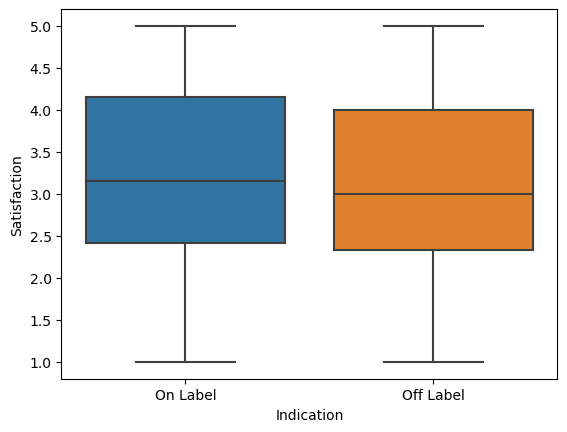

In [42]:
sns.boxplot(x=drug['Indication'], y = drug['Satisfaction'])
plt.show()

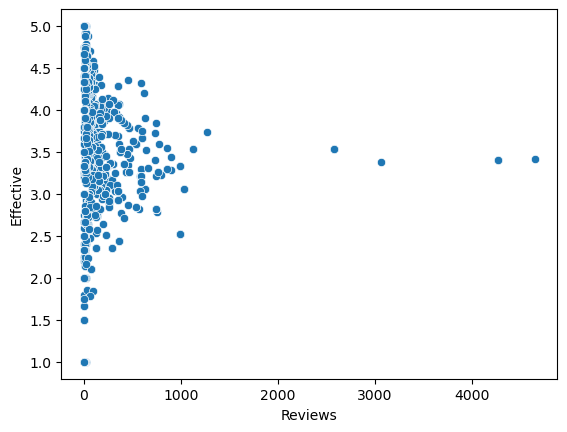

In [43]:
sns.scatterplot(x=drug['Reviews'], y=drug['Effective'])
plt.show()

In [44]:
drug[drug['Reviews'] > 2000]

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction
80,Atopic Dermatitis,Prednisone,On Label,RX,2575,3.54,3.64,2.74
81,Atopic Dermatitis,Prednisone,On Label,RX,2575,3.54,3.64,2.74
82,Atopic Dermatitis,Prednisone,On Label,RX,2575,3.54,3.64,2.74
1186,fibromyalgia,Duloxetine,On Label,RX,4647,3.41,4.13,3.08
1187,fibromyalgia,Pregabalin,On Label,RX,3066,3.38,4.07,3.00
1666,hypertension,Lisinopril,On Label,RX,4268,3.40,4.00,2.72
1667,hypertension,Lisinopril,On Label,RX,4268,3.40,4.00,2.72


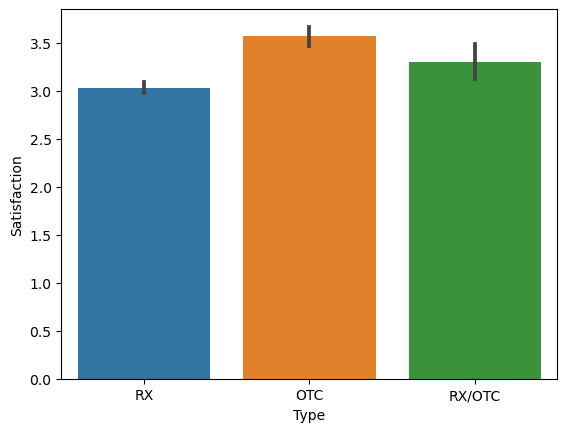

In [45]:
sns.barplot(x=drug['Type'], y= drug['Satisfaction'])
plt.show()

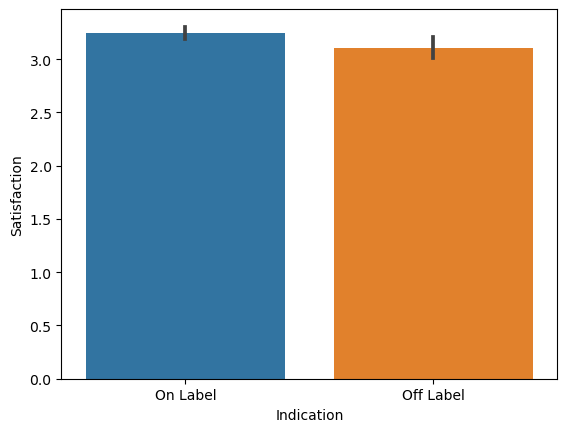

In [46]:
sns.barplot(x=drug['Indication'], y= drug['Satisfaction'])
plt.show()

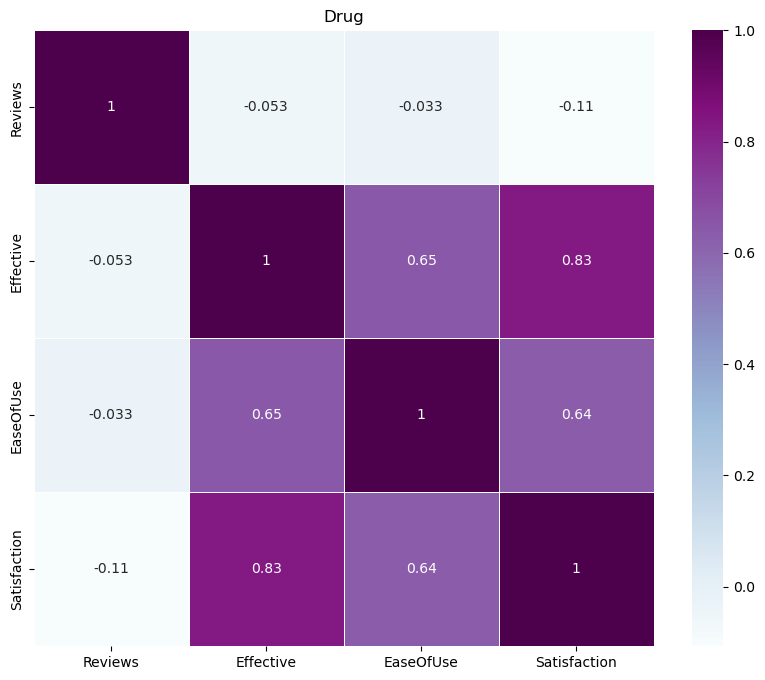

In [47]:
numerical_columns = drug.select_dtypes(include=['float64', 'int64']).columns
drug_numerical = drug[numerical_columns]

correlation_matrix = drug_numerical.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', linewidths=.5)
plt.title('Drug')
plt.show()

Since Reviews column is not contributing anything to target variable, we can remove it

In [48]:
drug = drug.drop(columns=['Reviews'])

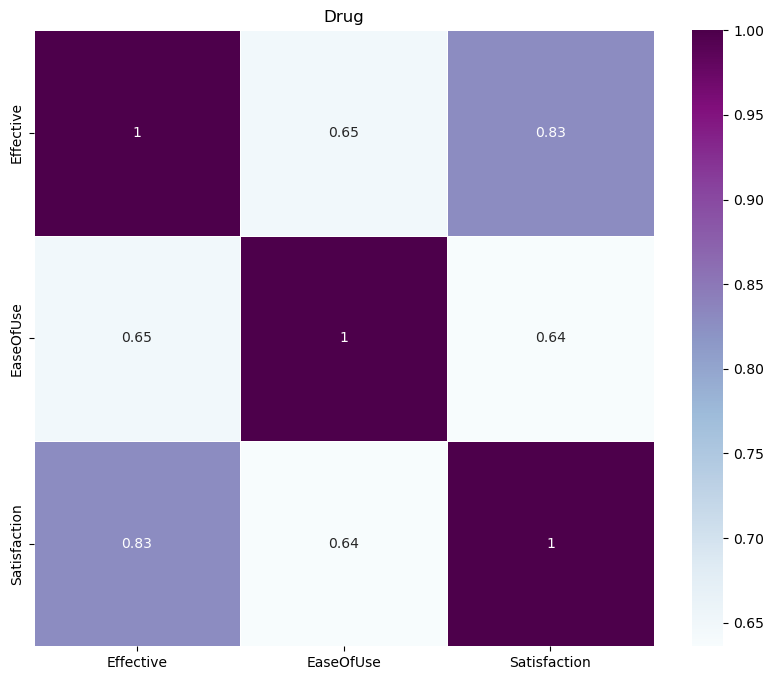

In [49]:
numerical_columns = drug.select_dtypes(include=['float64', 'int64']).columns
drug_numerical = drug[numerical_columns]

correlation_matrix = drug_numerical.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', linewidths=.5)
plt.title('Drug')
plt.show()

Let us now look at Categorical Columns, Here we are using Label Encoder and One-Hot Encoder

In [50]:
label_encoder = LabelEncoder()
drug['Condition'] = label_encoder.fit_transform(drug['Condition'])
drug['Drug'] = label_encoder.fit_transform(drug['Drug'])

In [51]:
drug = pd.get_dummies(drug, columns=['Indication', 'Type'], drop_first=True, dtype=int)

In [52]:
drug.head()

,Condition,Drug,Effective,EaseOfUse,Satisfaction,Indication_On Label,Type_RX,Type_RX/OTC
0,0,271,2.52,3.01,1.84,1,1,0
1,0,271,2.52,3.01,1.84,1,1,0
2,0,319,2.78,3.00,2.08,1,1,0
3,0,58,3.21,4.01,2.57,1,1,0
4,0,58,3.21,4.01,2.57,1,1,0


In [53]:
drug = drug.rename(columns={'Indication_On Label':'Indication_On_Label'})

In [54]:
drug.head()

,Condition,Drug,Effective,EaseOfUse,Satisfaction,Indication_On_Label,Type_RX,Type_RX/OTC
0,0,271,2.52,3.01,1.84,1,1,0
1,0,271,2.52,3.01,1.84,1,1,0
2,0,319,2.78,3.00,2.08,1,1,0
3,0,58,3.21,4.01,2.57,1,1,0
4,0,58,3.21,4.01,2.57,1,1,0


In [55]:
drug['Satisfaction'] = drug.pop('Satisfaction') #To visually put the target variable at the end

In [56]:
drug.head()

,Condition,Drug,Effective,EaseOfUse,Indication_On_Label,Type_RX,Type_RX/OTC,Satisfaction
0,0,271,2.52,3.01,1,1,0,1.84
1,0,271,2.52,3.01,1,1,0,1.84
2,0,319,2.78,3.00,1,1,0,2.08
3,0,58,3.21,4.01,1,1,0,2.57
4,0,58,3.21,4.01,1,1,0,2.57


In [57]:
X = drug.iloc[:,:-1]
y = drug.iloc[:,-1]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [59]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [61]:
X_train_scaled

array([[-1.62315366, -1.19278248,  0.39755058, ...,  0.50675199,
         0.75289773, -0.1917293 ],
       [ 0.05425732, -1.59297404, -2.283326  , ...,  0.50675199,
        -1.32820164, -0.1917293 ],
       [ 0.94229843, -0.09407475, -2.283326  , ...,  0.50675199,
         0.75289773, -0.1917293 ],
       ...,
       [-1.52448243,  0.15331639, -2.283326  , ...,  0.50675199,
        -1.32820164,  5.2156869 ],
       [-1.03112626, -0.18866548, -0.49607494, ...,  0.50675199,
         0.75289773, -0.1917293 ],
       [ 1.04096966,  0.08055429, -1.38970047, ...,  0.50675199,
         0.75289773, -0.1917293 ]])

In [62]:
X_test_scaled

array([[ 0.15292855,  0.66992731, -0.17436976, ..., -1.97335188,
         0.75289773, -0.1917293 ],
       [-0.04441391,  0.3716027 ,  1.29117611, ..., -1.97335188,
         0.75289773, -0.1917293 ],
       [ 1.04096966, -1.36741152, -0.21905103, ...,  0.50675199,
         0.75289773, -0.1917293 ],
       ...,
       [-1.52448243, -0.45788526,  0.10265416, ...,  0.50675199,
         0.75289773, -0.1917293 ],
       [-1.32713996, -0.79986713, -0.63011877, ...,  0.50675199,
         0.75289773, -0.1917293 ],
       [ 0.05425732, -1.25099216,  1.29117611, ...,  0.50675199,
        -1.32820164, -0.1917293 ]])